# <span style="color:#0000aa">Tropycal: A Python Package for Analyzing Tropical Cyclones and More</span>

<span style="color:green">Tomer Burg, Sam P. Lillo</span>

34th Conference on Hurricanes and Tropical Meteorology

# Note

This presentation uses code from Tropycal that is already included in v0.2.4 (the latest release on pip), as well as updated code that has not yet been released on pip due to unforeseen circumstances. We hope to have it released this weekend, and this script will be updated accordingly once version 0.2.5 is released.

## What is Tropycal?

- Tropycal is an open source Python package intended to simplify the process of obtaining and analyzing tropical cyclone data


- Tropical cyclone data can be retrieved globally, and quickly analyzed and plotted in a few simple lines of code


- Tropycal aims to provide tools for the operational and research communities for past and current tropical cyclones

## Why use Tropycal?

- Python has become a dominant programming language in Atmospheric Science in recent years


- Dedicated Python packages exist for standard meteorological calculations (e.g., MetPy), radar (e.g., Py-ART), etc.


- There is currently no dedicated and centralized package for tropical cyclone data and analyses

## Starting Your Code

- If you have little to no experience with Python, this section can be of use to you!


- When we start a Python script, we import the necessary package(s) that the script will use


- Tropycal works with Python 3.6 and higher, and uses Cartopy for plotting maps

In [1]:
#First, we import Tropycal and its key components: "tracks", "tornado", and "recon"
from tropycal import tracks, tornado, recon

#We then import "numpy" for mathematical calculations, and "datetime" for date and time functionality
import numpy as np
from datetime import datetime as dt,timedelta

#For the purposes of this talk, we'll be ignoring warnings from functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Tropycal Data Structure

- Tropical cyclone data in Tropycal is organized into three primary structures:
     - <span style="color:blue;font-weight:bold">TrackDataset &#8594;</span> data from all tropical cyclones in this basin
     - <span style="color:blue;font-weight:bold">Season &#8594;</span> data from all storms in a single season
     - <span style="color:blue;font-weight:bold">Storm &#8594;</span> data from single storm


- Tropycal further contains tools for analyzing **tornadoes** and **reconaissance mission** data

## Reading in HURDATv2 Data

- To start off, we read in the HURDATv2 dataset containing North Atlantic tropical cyclones from 1851-present


- This data will be stored in a variable called "basin", containing the data and additional functions for data analysis
    - *"basin" is an instance of the object TrackDataset*


- We include a flag "include_btk=True" to read in the latest tropical cyclones not included in HURDATv2 yet

In [3]:
basin = tracks.TrackDataset('north_atlantic',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (6.72 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (0.31 seconds)


# TrackDataset object

- Now that we've read in HURDATv2 data into the "basin" variable, we can begin our analyses!


- First, let's take a look at what is contained in basin:

In [4]:
print(basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1936
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2021


# TrackDataset object

- Let's do a simple exercise - say we want to look at a time series of **Accumulated Cyclone Energy (ACE)** from 2020


- We also want to compare the ACE from 2020 to that from 2004, 2005 and 2017


- For that, we use the `ace_climo()` function:

<AxesSubplot:title={'left':'2021 North Atlantic Accumulated Cyclone Energy '}>

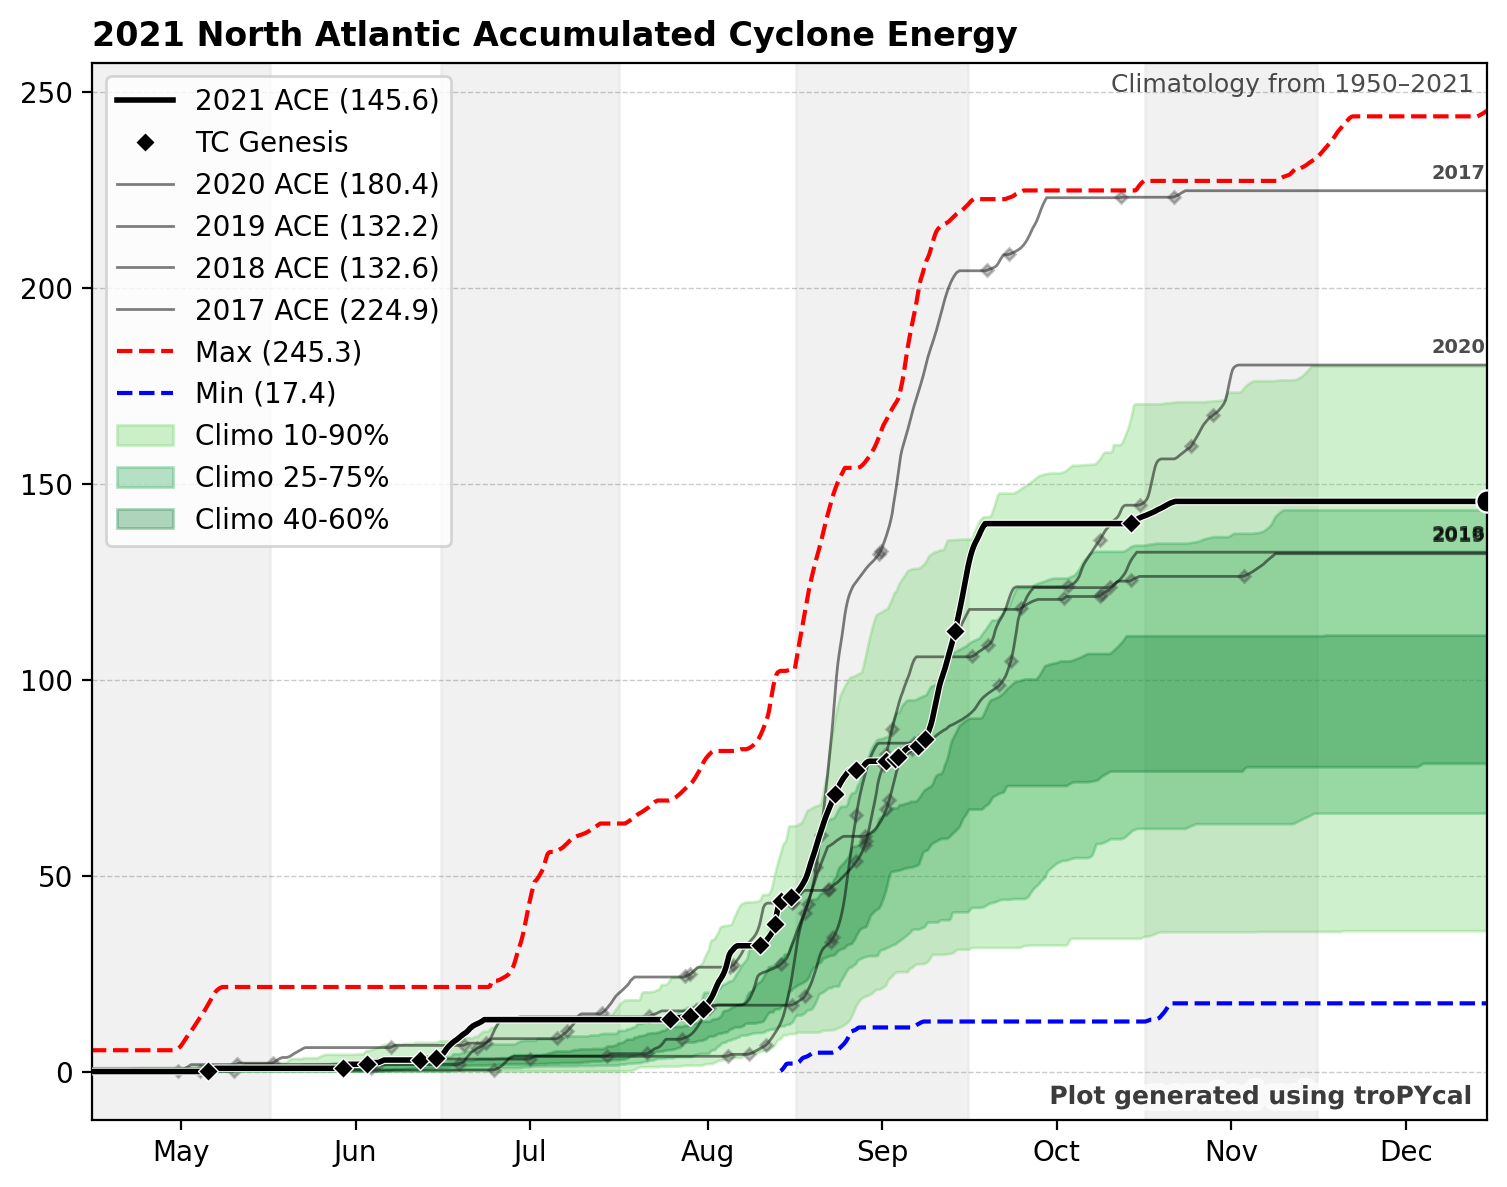

In [6]:
basin.ace_climo(2021,compare_years=(2020,2019,2018,2017))

# TrackDataset object

- `filter_storms()` is a powerful function - one can filter storms by various thresholds


- For example, say we want to retrieve a list of all storms that intensified by >=90 kt over a 36 hour period:

In [7]:
#Add "doInterp=True" to interpolate storm data linearly to hourly
storms = basin.filter_storms(thresh={'dv_min':90,'dt_window':36},doInterp=True)

#Print the list of storm IDs:
print(storms)

['AL031935', 'AL041992', 'AL062007', 'AL252005', 'AL262020', 'AL292020']


# TrackDataset object

- Having a list of storm IDs that meet this criteria is great and all, but we want to know their names too!


- Luckily, the TrackDataset object has a `get_storm_tuple()` function

    - **Input:** storm ID as a string (e.g., "AL252005")
    - **Output:** Tuple containing storm name and year (e.g., "Wilma, 2005")

In [8]:
for name in storms:
    print(basin.get_storm_tuple(name))

('UNNAMED', 1935)
('ANDREW', 1992)
('FELIX', 2007)
('WILMA', 2005)
('DELTA', 2020)
('ETA', 2020)


# TrackDataset object

- Next, we want to make a plot of these storm tracks


- We want to omit plotting the 6-hour position dots, and coloring the lines by SSHWS category

<GeoAxesSubplot:title={'left':'TC Track Composite'}>

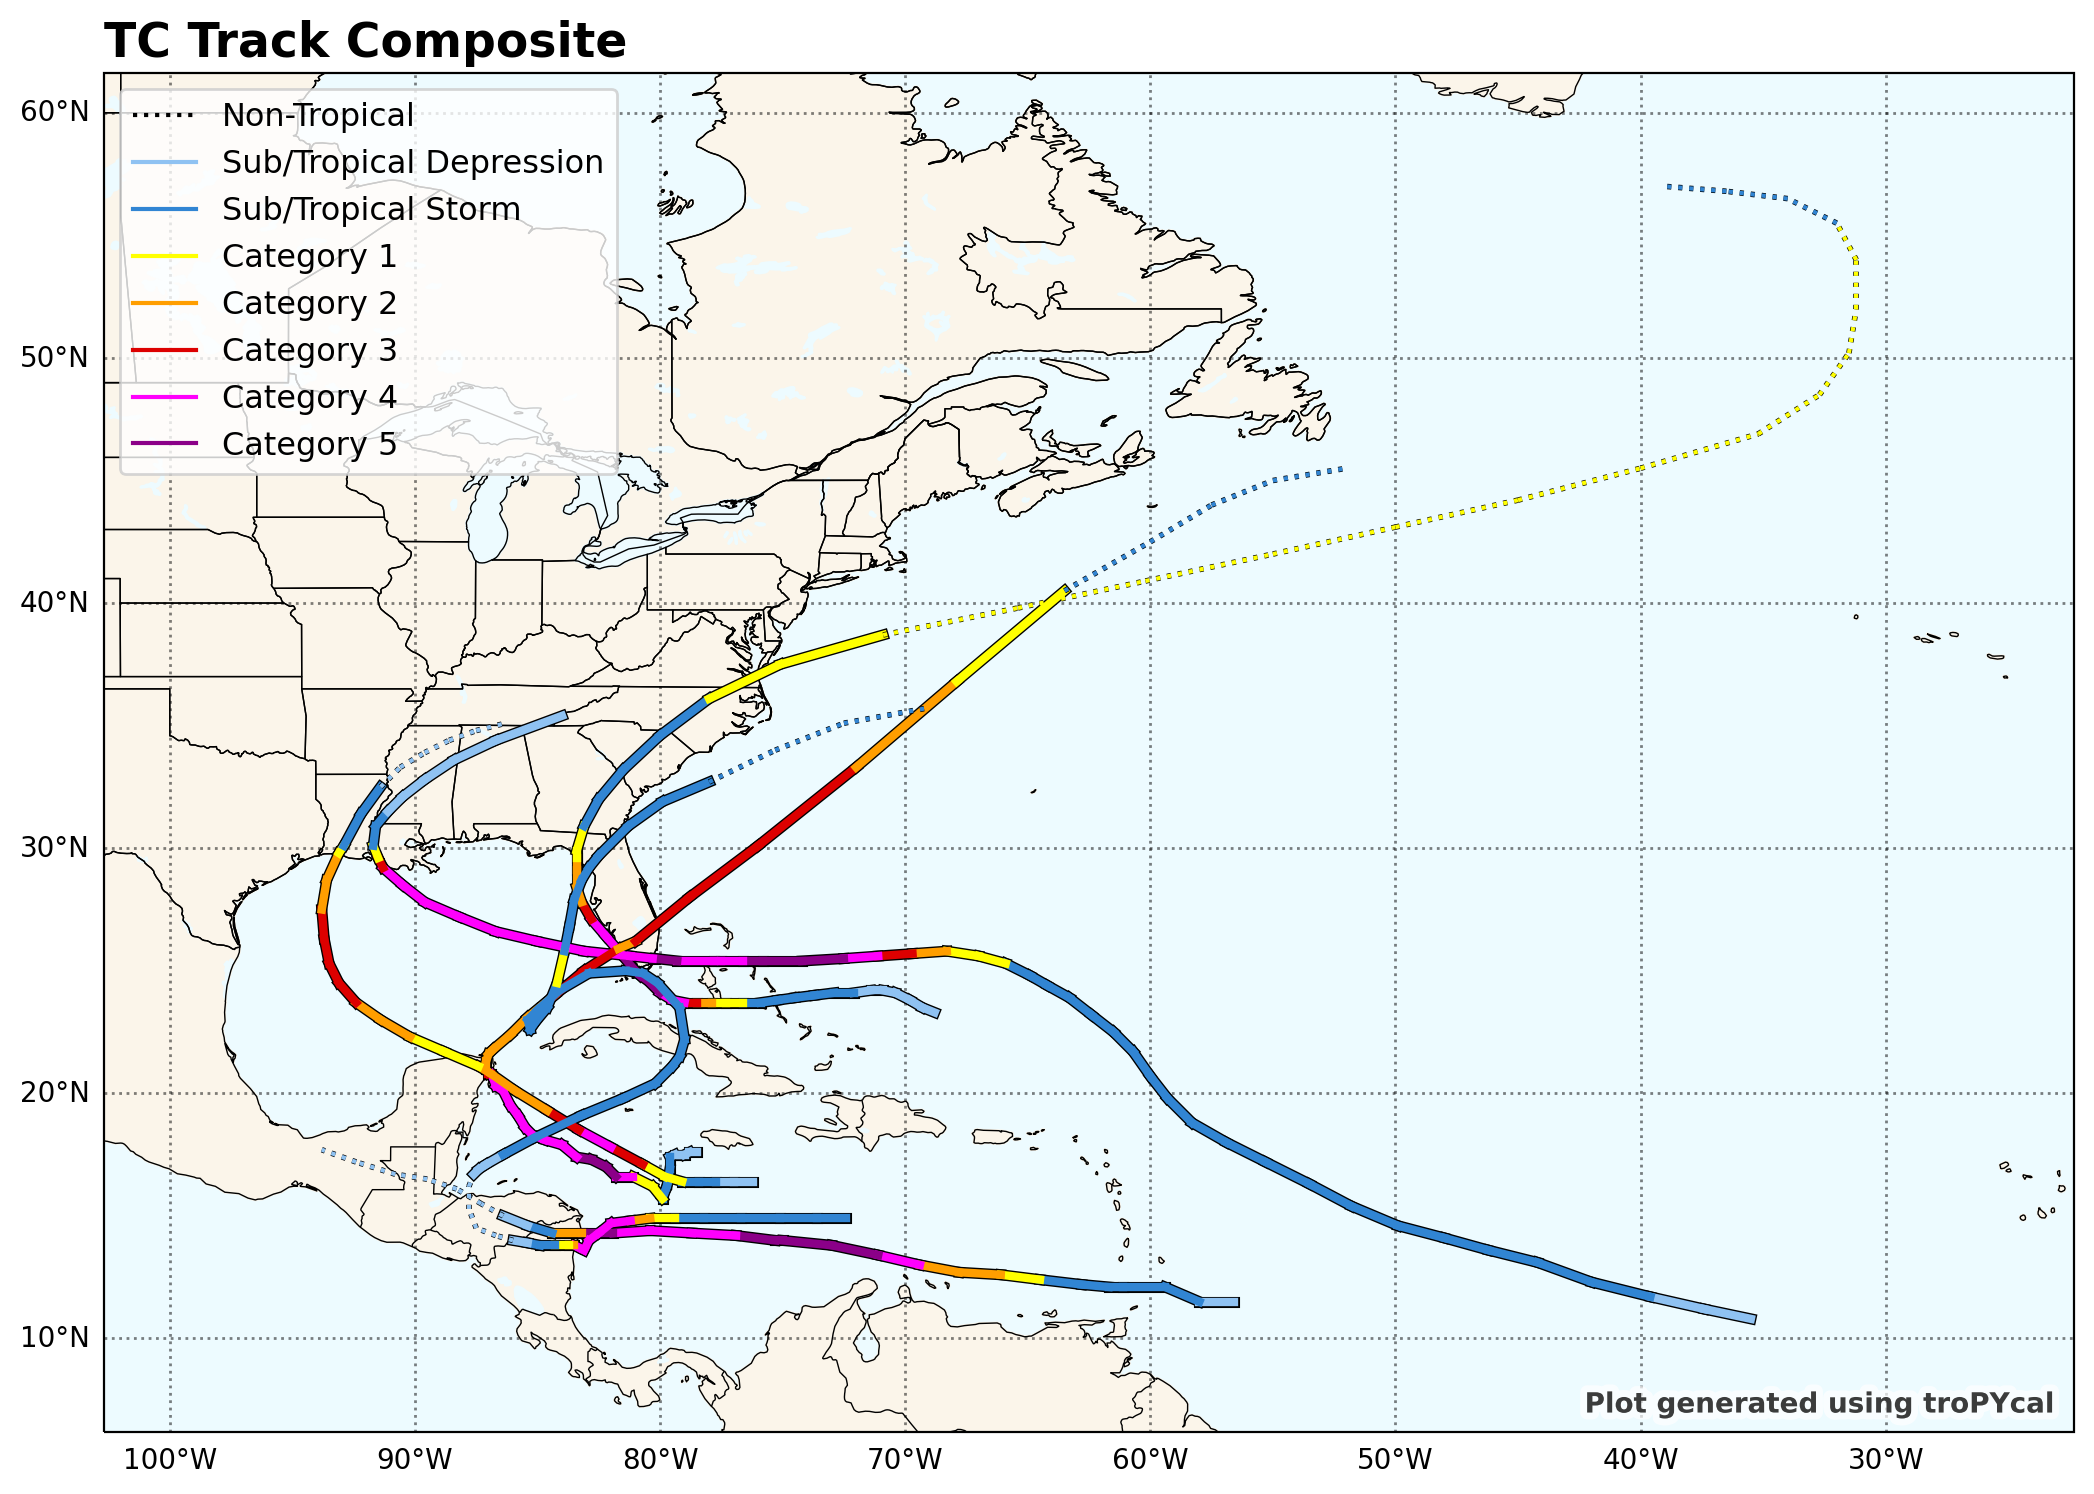

In [9]:
basin.plot_storms(storms,prop={'dots':False,'linecolor':'category','linewidth':3})

# TrackDataset object

- Another powerful tool via a TrackDataset object is `gridded_stats()`


- This function creates a lat/lon grid of multiple variables as specified by a user query


- For example, let's plot the HURDATv2 minimum pressure change over a 24-hour period, by 2.5 degree gridpoint:

Minimum pressure change in 24 hours
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm
--> Generating plot


AttributeError: 'Bbox' object has no attribute 'inverse_transformed'

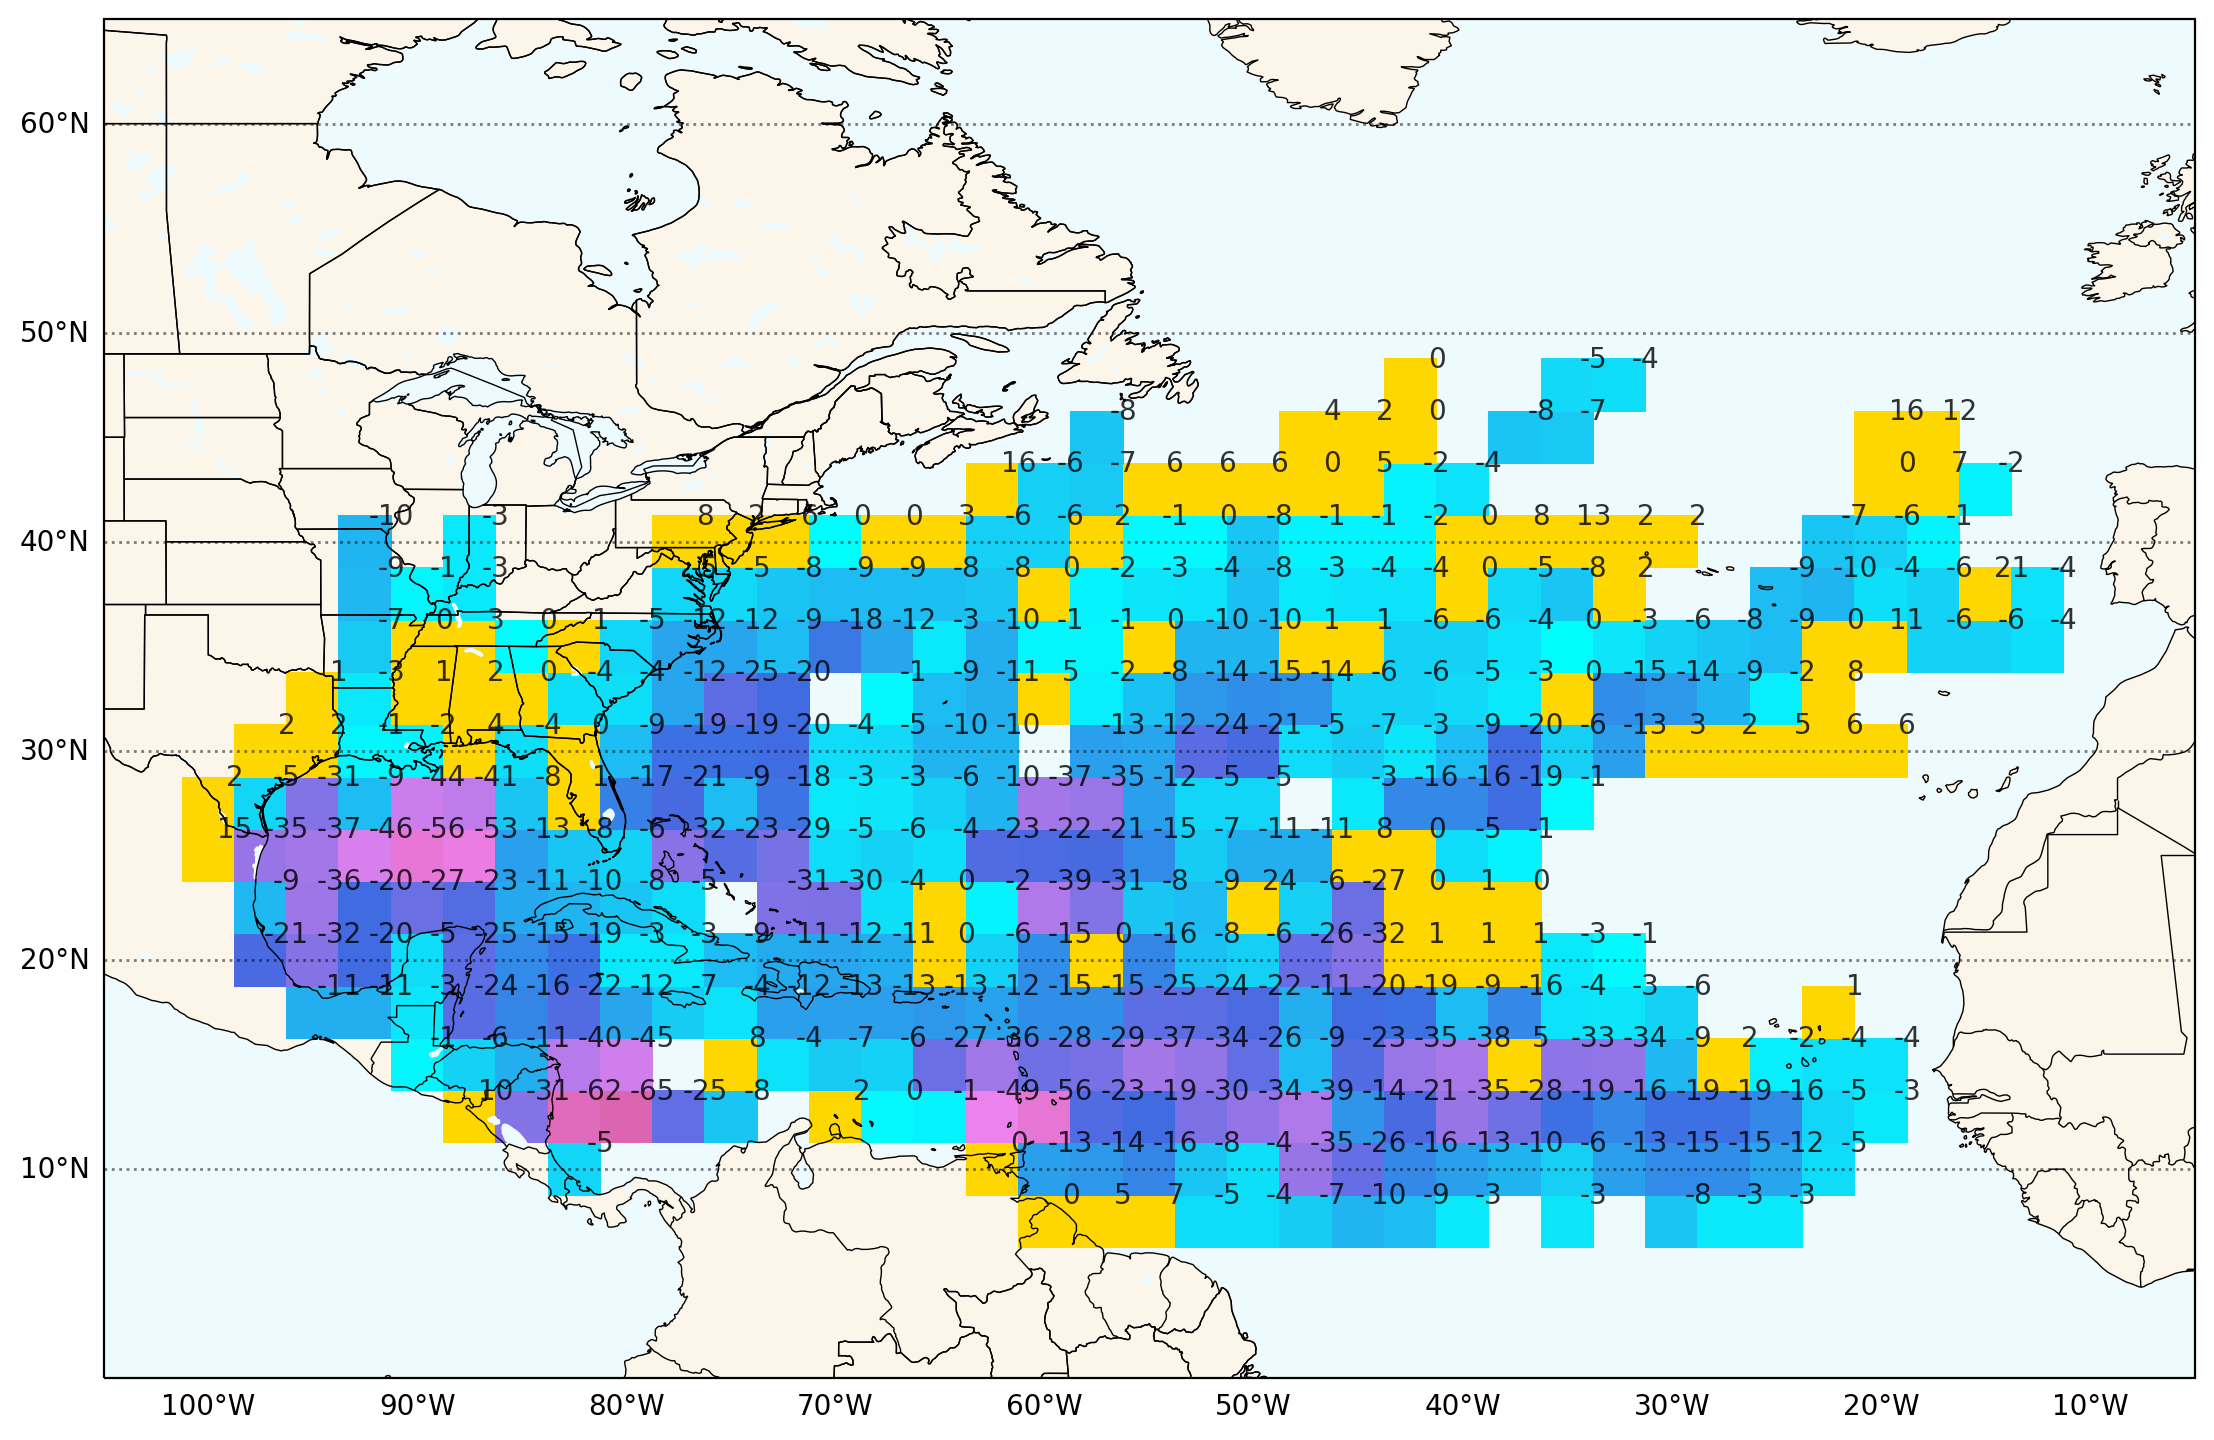

In [14]:
mycmap = {-100:'firebrick',-50:'violet',-20:'royalblue',-.001:'cyan',0:'gold',10:'gold'}
basin.gridded_stats('Minimum pressure change in 24 hours',binsize=2.5,year_range=(2017,2021),prop={'plot_values':True,'cmap':mycmap,'levels':(-100,10)})

# TrackDataset object

- But wait -- there's more!


- This presentation is North Atlantic centric, but Tropycal can read in HURDAT data from the East Pacific & IBTrACS data globally


- There are several methods of reading in IBTrACS data, whether JMA, JTWC, or JTWC_Neumann


- We can plot the 2020 ACE anomaly vs. the 1979-2019 climatology
    - <span style="color:gray">*Side note: If you want to retrieve the grid as a numpy array, add `return_array=True` in the arguments!*</span>

In [15]:
allbasins = tracks.TrackDataset('all',source='ibtracs',ibtracts_mode='jtwc')
mycmap = {-2:'mediumblue',-0.1:'skyblue',0:'0.8',.1:'lightsalmon',2:'firebrick'}
ax = allbasins.gridded_stats('ACE',year_range=(2020,2020),year_range_subtract=(1979,2019),year_average=True,binsize=2.5,\
                    prop={'cmap':mycmap,'smooth':1},return_ax=True)
ax.set_title('Accumulated Cyclone Energy \n 1$\sigma$ smoothed',loc='left',fontsize=17,fontweight='bold')

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (87.05 seconds)


TypeError: gridded_stats() got an unexpected keyword argument 'return_ax'

# Season object

- We've looked at the full dataset object, but what if we only want to focus on a single season?


- The 2020 Atlantic hurricane season was exceptionally active -- let's take a look!

In [16]:
#Retrieve the 2017 Atlantic hurricane season
season = basin.get_season(2017)

#Check the season content
print(season)

<tropycal.tracks.Season>
Season Summary:
    Total Storms:      18
    Named Storms:      17
    Hurricanes:        10
    Major Hurricanes:  6
    Season ACE:        224.8

More Information:
    year:          2017
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


# Season object

- To get a quick look through the season's storms, we can handily convert the season to a `Pandas.DataFrame` object:

In [17]:
season.to_dataframe()

id      name  vmax  mslp  category   ace          start_time  \
0   AL012017    ARLENE    45   990         0   0.8 2017-04-19 00:00:00   
1   AL022017      BRET    45  1007         0   0.5 2017-06-19 18:00:00   
2   AL032017     CINDY    50   991         0   1.8 2017-06-20 18:00:00   
3   AL042017      FOUR    25  1009        -1   0.0 2017-07-05 18:00:00   
4   AL052017       DON    45  1005         0   0.8 2017-07-17 06:00:00   
5   AL062017     EMILY    50  1001         0   0.6 2017-07-30 18:00:00   
6   AL072017  FRANKLIN    75   981         1   3.7 2017-08-07 00:00:00   
7   AL082017      GERT    95   962         2   7.8 2017-08-12 18:00:00   
8   AL092017    HARVEY   115   937         4  11.4 2017-08-17 06:00:00   
9   AL112017      IRMA   155   914         5  64.9 2017-08-30 00:00:00   
10  AL122017      JOSE   135   938         4  43.3 2017-09-05 06:00:00   
11  AL132017     KATIA    90   972         2   6.1 2017-09-05 12:00:00   
12  AL142017       LEE   100   962         3  17.9 2017-09-14 18:00:00   
13  AL152017     MARIA   150   908         5  44.8 2017-09-16 12:00:00   
14  AL162017      NATE    80   981         1   4.1 2017-10-04 12:00:00   
15  AL172017   OPHELIA   100   959         3  14.5 2017-10-09 06:00:00   
16  AL182017  PHILIPPE    35  1000         0   0.1 2017-10-28 12:00:00   
17  AL192017      RINA    50   991         0   1.7 2017-11-05 18:00:00   

              end_time  start_lat  start_lon  
0  2017-04-21 06:00:00       31.1      -42.6  
1  2017-06-20 09:00:00        9.2      -58.9  
2  2017-06-23 12:00:00       25.6      -90.6  
3  2017-07-07 12:00:00       12.0      -37.1  
4  2017-07-18 12:00:00       10.4      -49.1  
5  2017-08-01 18:00:00       28.4      -85.4  
6  2017-08-10 12:00:00       16.1      -82.7  
7  2017-08-17 12:00:00       24.0      -69.4  
8  2017-09-01 00:00:00       13.4      -52.0  
9  2017-09-12 00:00:00       16.1      -26.9  
10 2017-09-22 12:00:00       11.6      -37.9  
11 2017-09-09 12:00:00       22.2      -97.2  
12 2017-09-30 00:00:00       10.4      -23.1  
13 2017-09-30 12:00:00       12.2      -49.7  
14 2017-10-08 18:00:00       12.0      -81.8  
15 2017-10-15 18:00:00       30.9      -40.0  
16 2017-10-29 00:00:00       20.1      -83.5  
17 2017-11-09 00:00:00       29.2      -51.7

# Season object

- Let's plot a map of all of the storms in the 2020 Atlantic hurricane season:

<GeoAxesSubplot:title={'left':'2017 Atlantic Hurricane Season','right':'17 named • 10 hurricanes • 6 major\n224.8 Cumulative ACE'}>

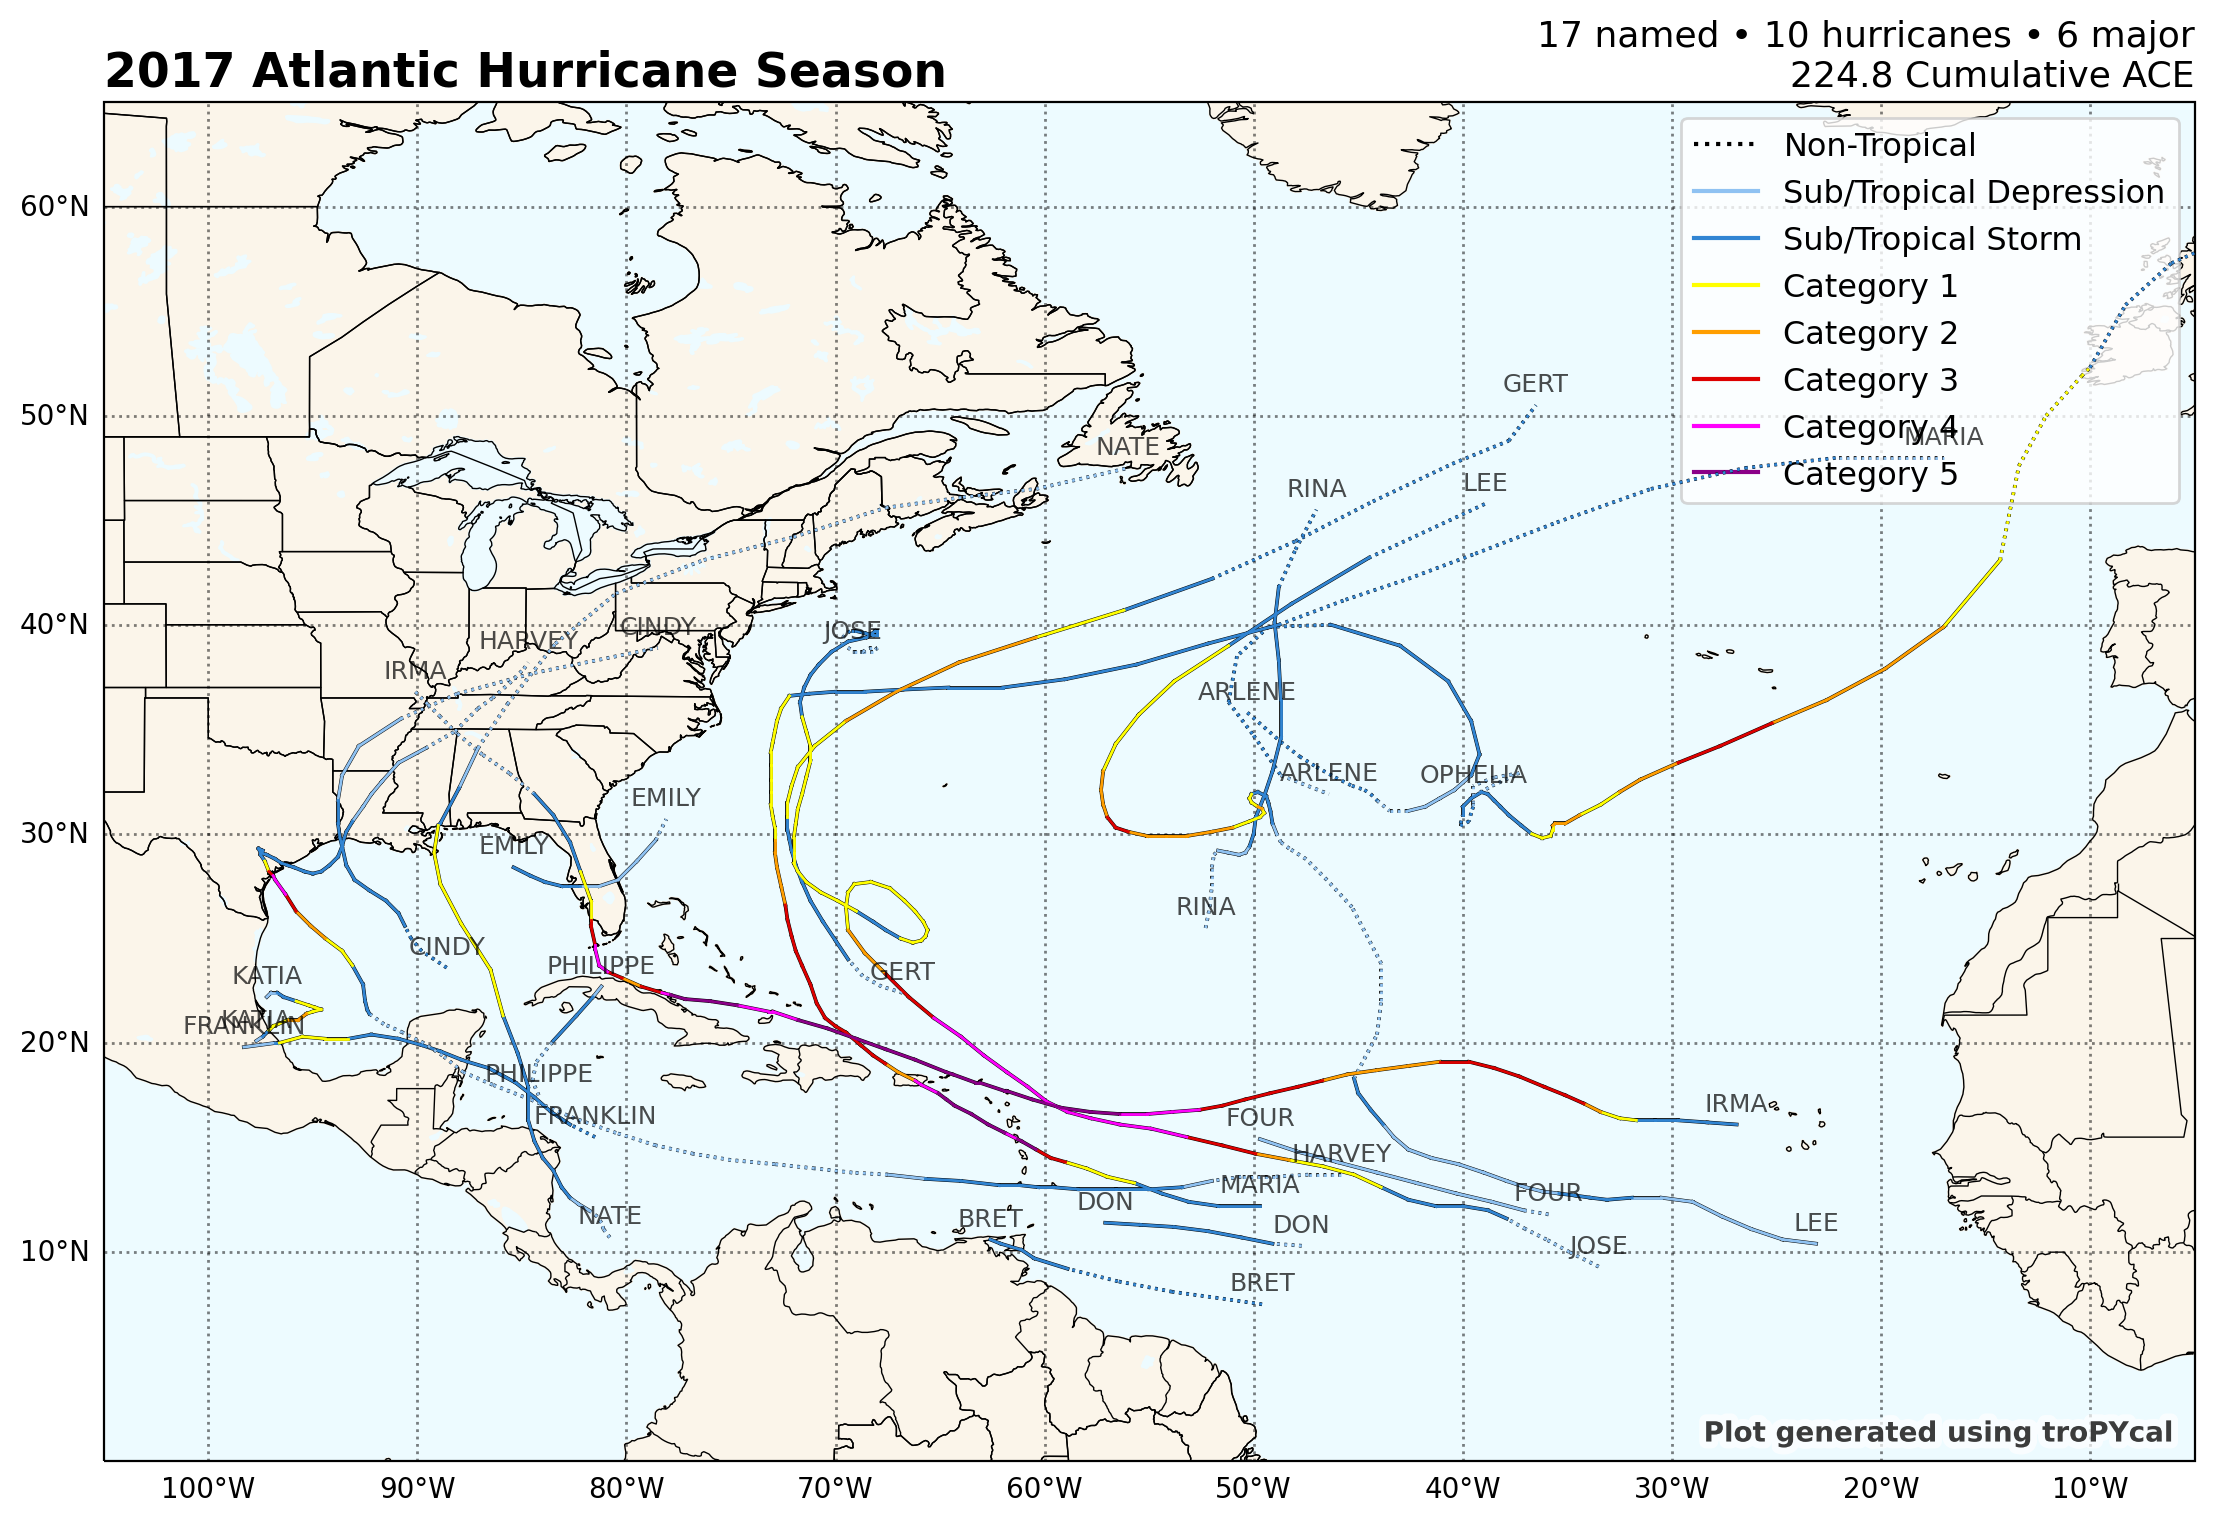

In [18]:
season.plot()

# Storm object

- Our next step is to delve down to analyzing individual storms!


- Let's start with Hurricane Florence from 2018:

In [10]:
storm = basin.get_storm(('Irma',2017))
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      155 knots
    Minimum Pressure:  914 hPa
    Start Date:        0000 UTC 30 August 2017
    End Date:          0000 UTC 12 September 2017

Variables:
    date        (datetime) [2017-08-30 00:00:00 .... 2017-09-13 12:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... LO]
    lat         (float64) [16.1 .... 36.8]
    lon         (float64) [-26.9 .... -90.1]
    vmax        (int32) [30 .... 15]
    mslp        (int32) [1008 .... 1005]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL112017
    operational_id:  AL112017
    name:            IRMA
    year:            2017
    season:          2017
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             64.9
    realtime:        False
    invest:          False


# Storm object

- For further data analysis, we can convert this storm to a `Pandas.DataFrame()` object:

In [11]:
storm.to_dataframe()

date  extra_obs special type   lat   lon  vmax  mslp  \
0  2017-08-30 00:00:00          0           TD  16.1 -26.9    30  1008   
1  2017-08-30 06:00:00          0           TS  16.2 -28.3    35  1007   
2  2017-08-30 12:00:00          0           TS  16.3 -29.7    45  1006   
3  2017-08-30 18:00:00          0           TS  16.3 -30.8    50  1004   
4  2017-08-31 00:00:00          0           TS  16.3 -31.7    55   999   
..                 ...        ...     ...  ...   ...   ...   ...   ...   
61 2017-09-12 12:00:00          0           LO  33.8 -86.9    20  1000   
62 2017-09-12 18:00:00          0           LO  34.8 -88.1    15  1003   
63 2017-09-13 00:00:00          0           LO  35.6 -88.9    15  1004   
64 2017-09-13 06:00:00          0           LO  36.2 -89.5    15  1004   
65 2017-09-13 12:00:00          0           LO  36.8 -90.1    15  1005   

         wmo_basin  
0   north_atlantic  
1   north_atlantic  
2   north_atlantic  
3   north_atlantic  
4   north_atlantic  
..             ...  
61  north_atlantic  
62  north_atlantic  
63  north_atlantic  
64  north_atlantic  
65  north_atlantic  

[66 rows x 9 columns]

# Storm object

- We can also convert this storm to an `xarray.Dataset()` object

In [12]:
print(storm.to_xarray()) #Add .to_netcdf("filename.nc") at the end to save as a netCDF file!

<xarray.Dataset>
Dimensions:    (time: 66)
Coordinates:
  * time       (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
Data variables:
    extra_obs  (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 0 0 0 0 0 0 0 0 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
    type       (time) <U2 'TD' 'TS' 'TS' 'TS' 'TS' ... 'LO' 'LO' 'LO' 'LO' 'LO'
    lat        (time) float64 16.1 16.2 16.3 16.3 16.3 ... 34.8 35.6 36.2 36.8
    lon        (time) float64 -26.9 -28.3 -29.7 -30.8 ... -88.9 -89.5 -90.1
    vmax       (time) int32 30 35 45 50 55 65 80 95 ... 45 35 25 20 15 15 15 15
    mslp       (time) int32 1008 1007 1006 1004 999 ... 1000 1003 1004 1004 1005
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL112017
    operational_id:  AL112017
    name:            IRMA
    year:            2017
    season:          2017
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    

# Storm object

- Plotting Florence's track is a simple line of code:

<GeoAxesSubplot:title={'left':'Hurricane IRMA','right':'30 Aug 2017 – 12 Sep 2017\n155 kt • 914 hPa • 64.9 ACE'}>

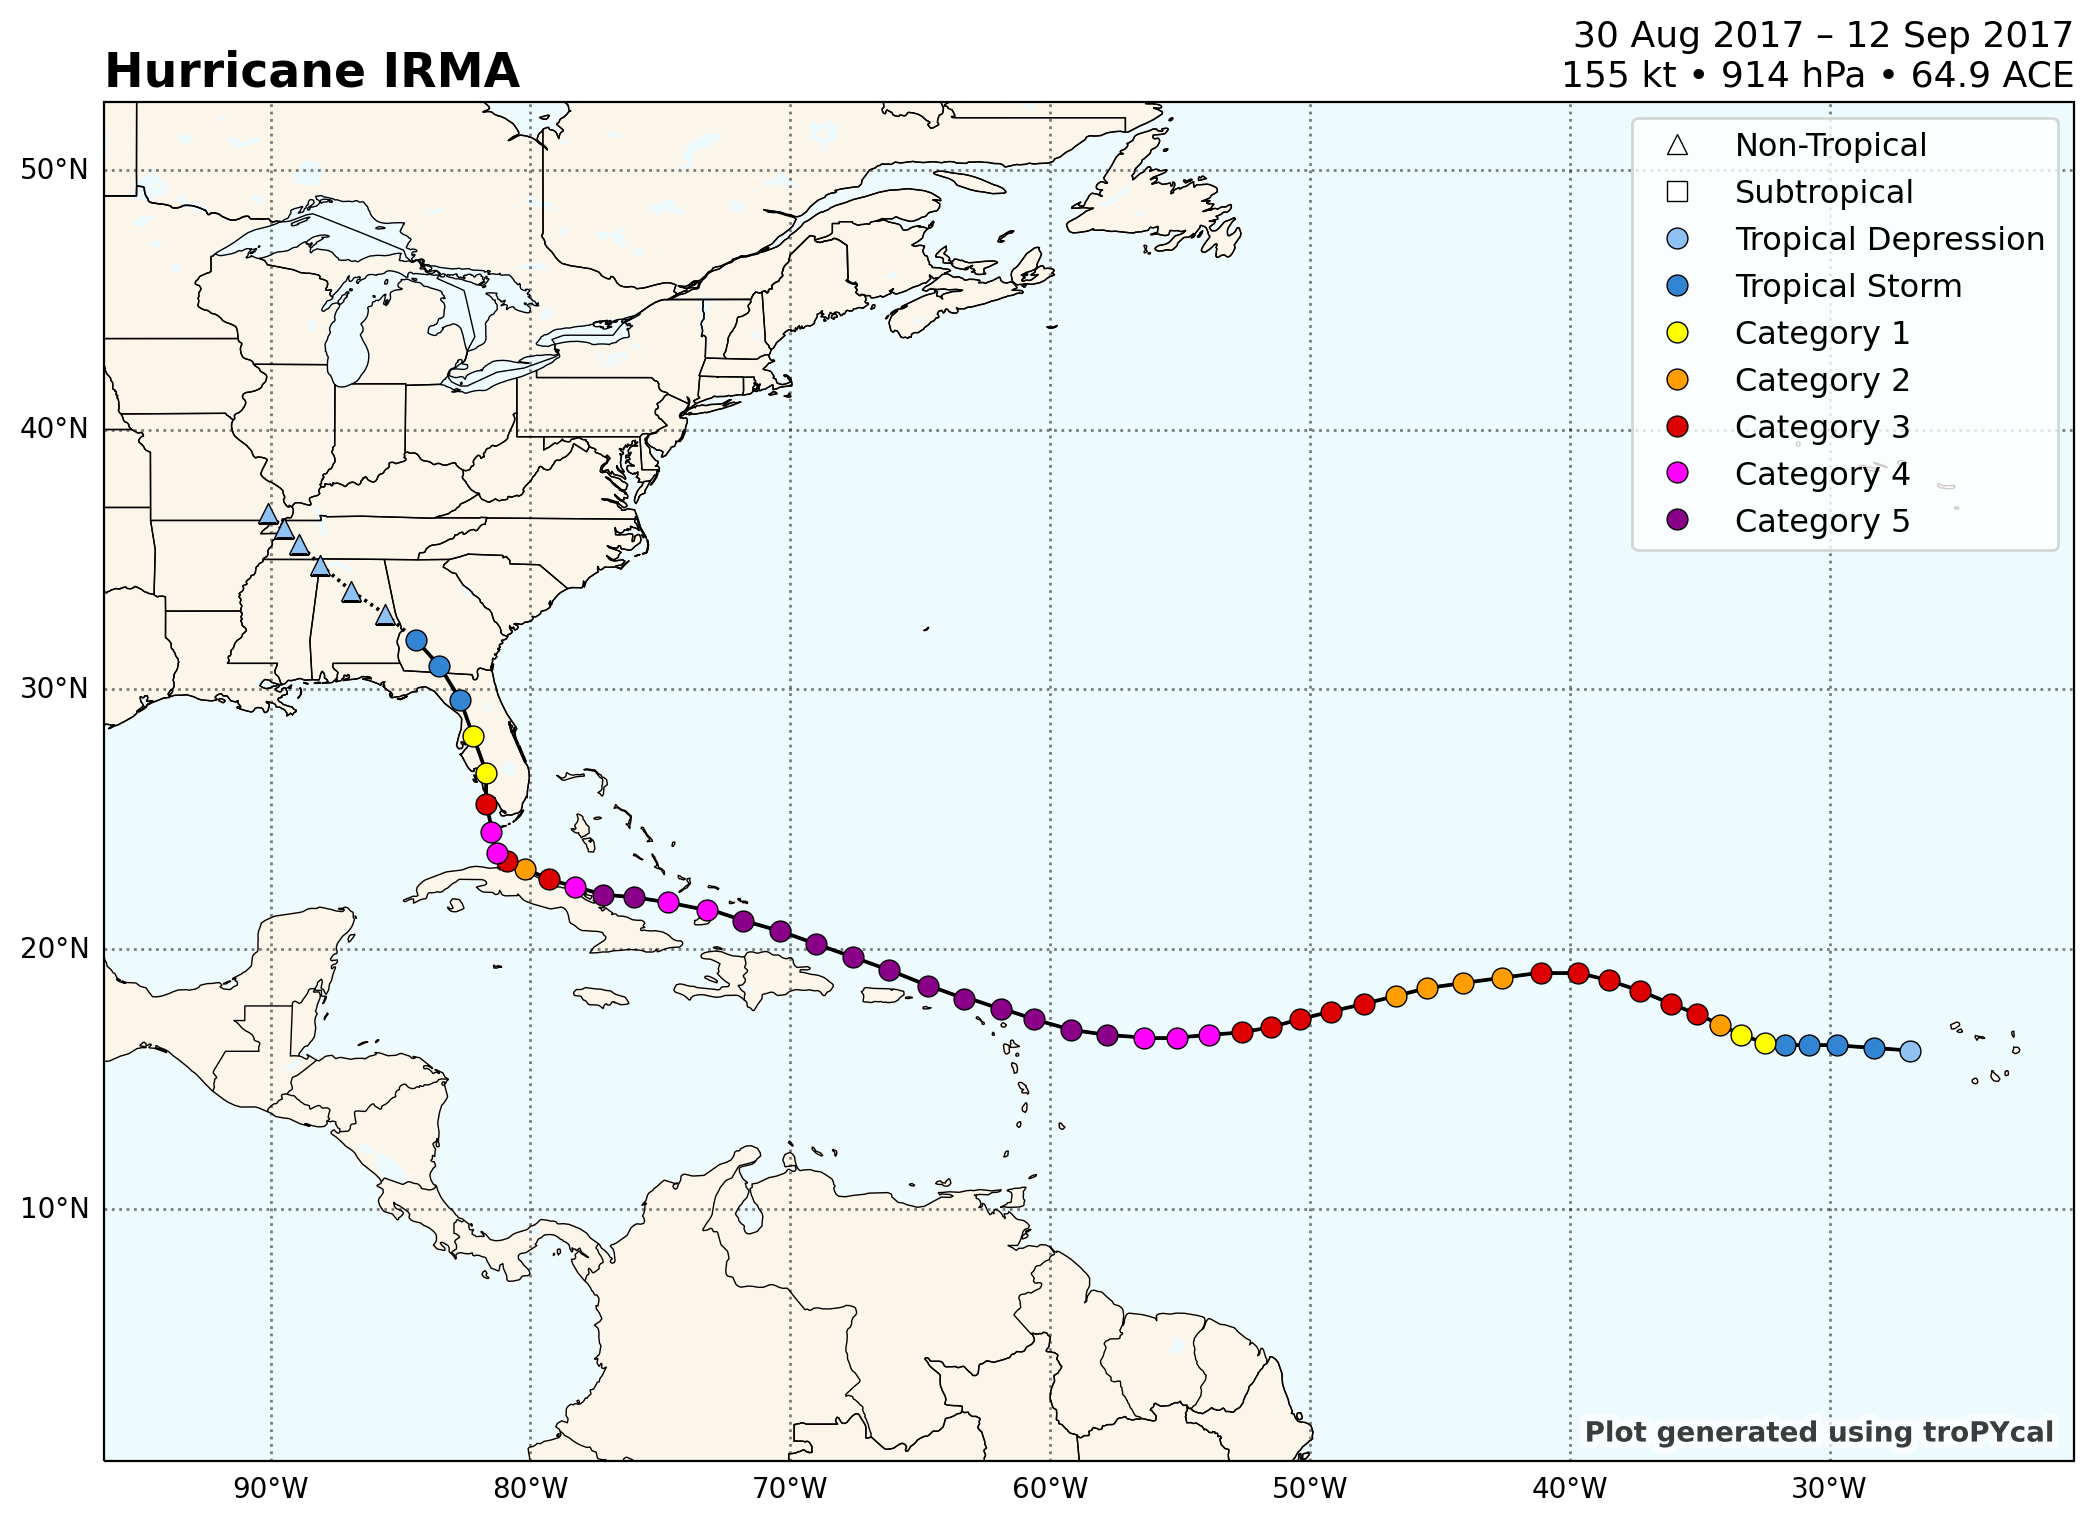

In [13]:
storm.plot()

# Storm object


- Let's delve into the National Hurricane Center (NHC) archives!


- Say we want to plot the official NHC forecast from <span style="color:blue">1200 UTC 7 September 2018</span>:

<GeoAxesSubplot:title={'left':'Hurricane IRMA','right':'120 mph • 944 hPa • Forecast #21\nForecast Issued: 1500 UTC 04 Sep 2017'}>

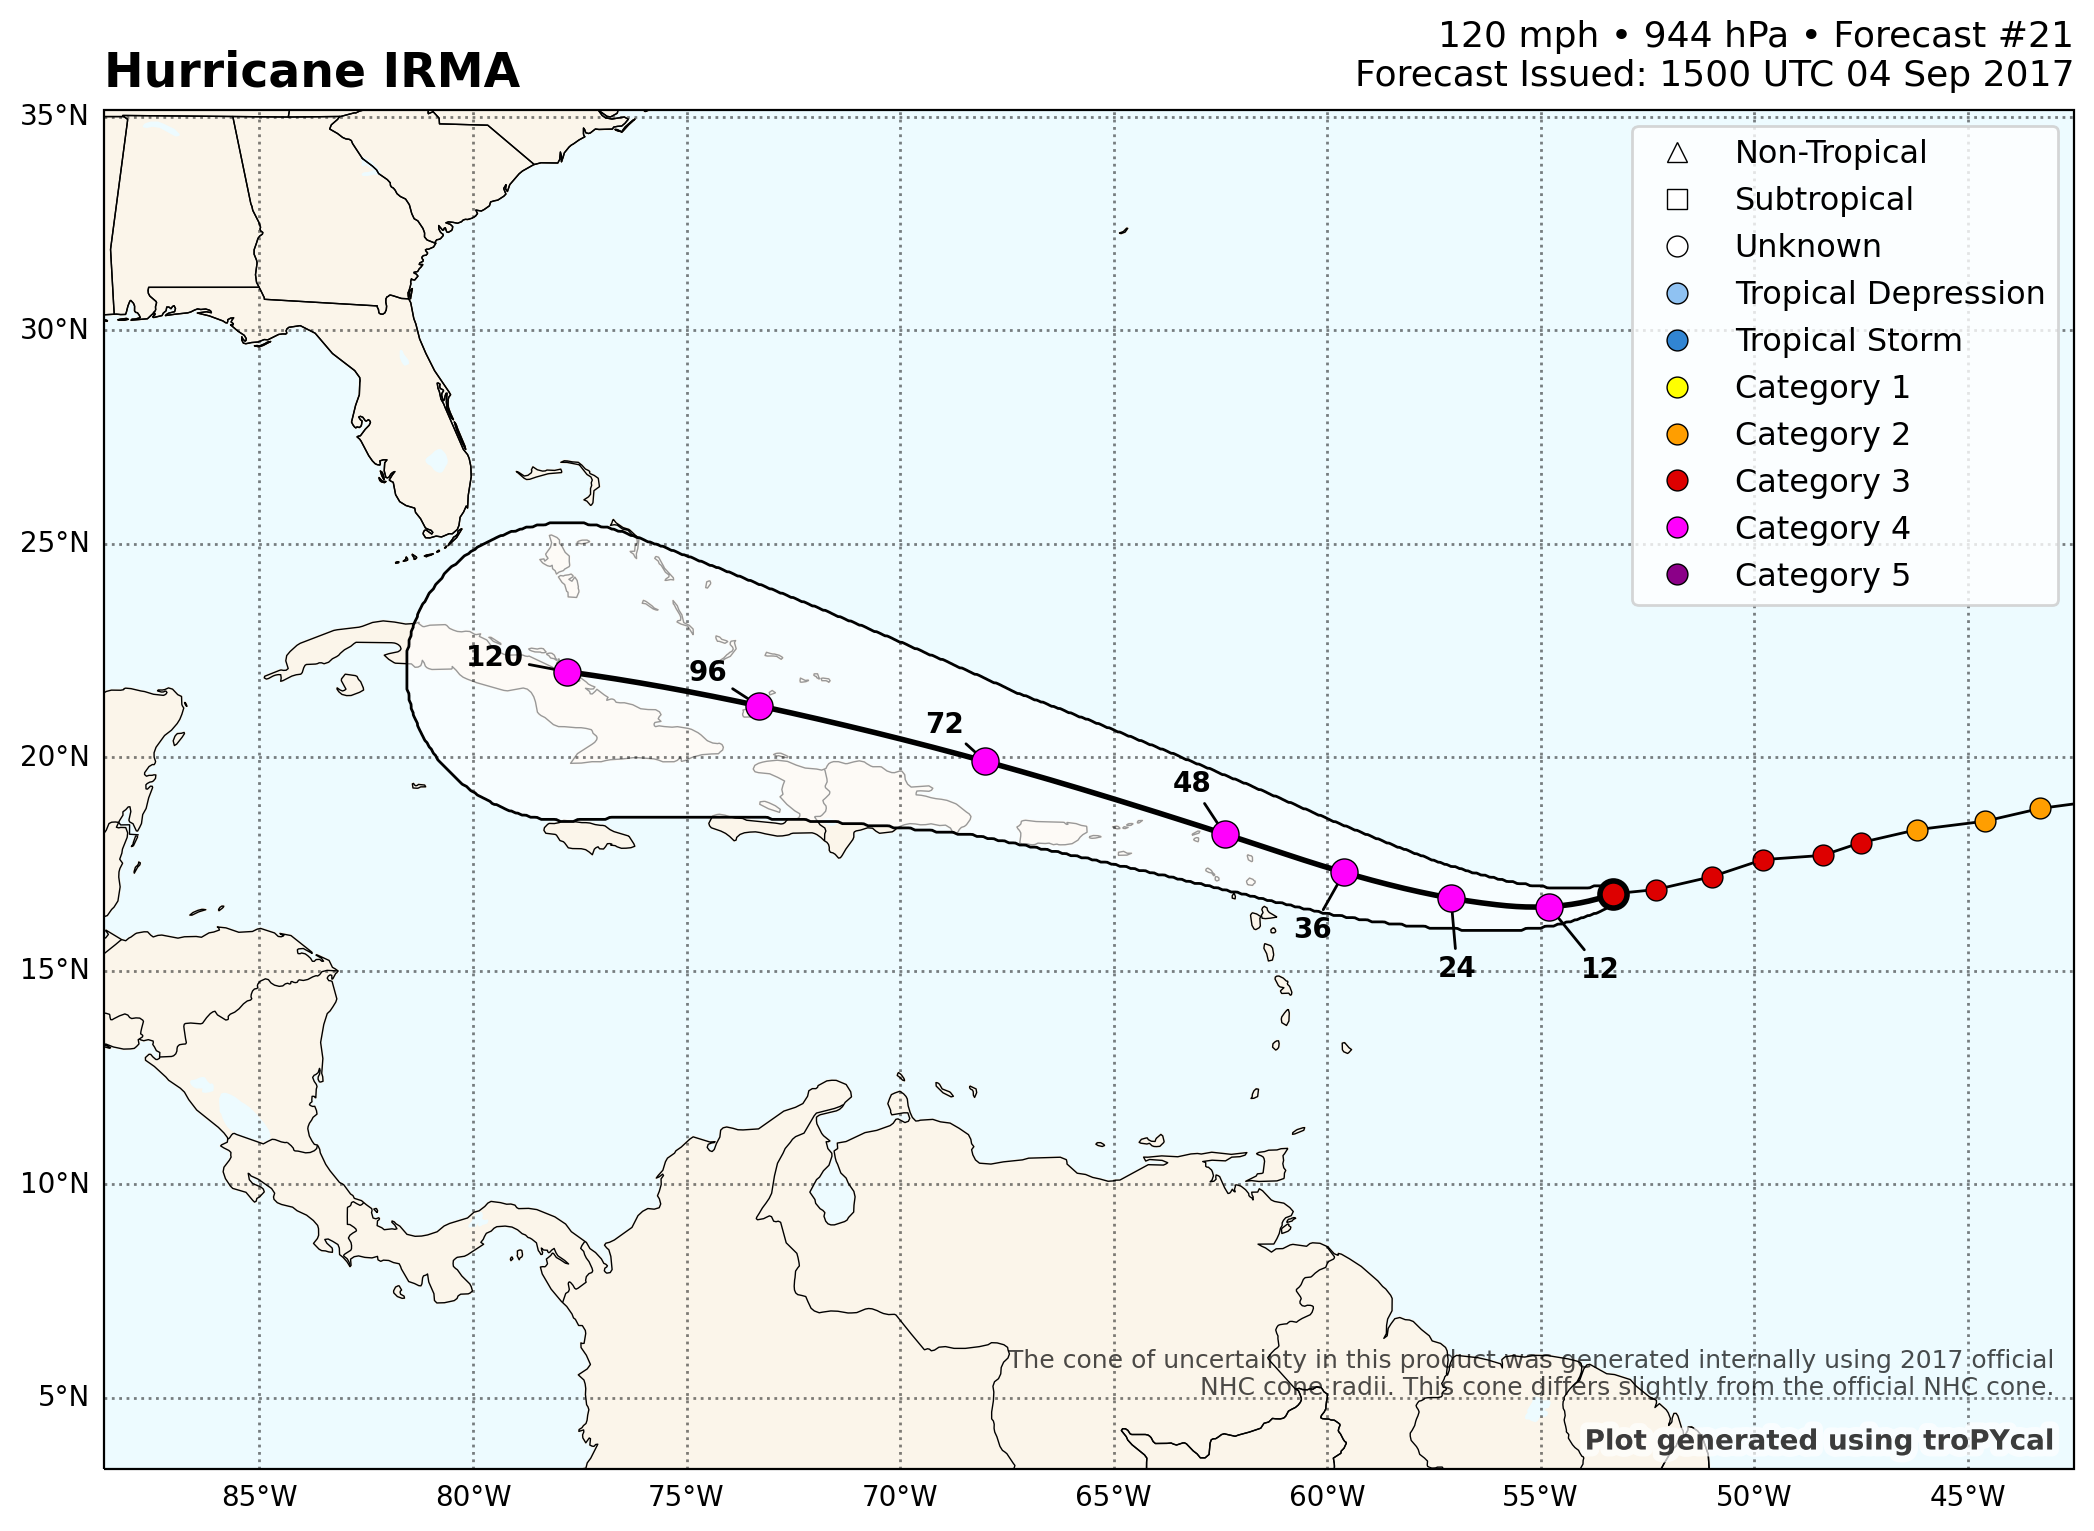

In [14]:
storm.plot_nhc_forecast(dt(2017,9,4,12))

# Storm object

- That's quite a remarkable forecast - quick intensification into a Category 4 hurricane!


- Let's glance at the forecast discussion that accompanied this:

In [15]:
discussion_info = storm.get_nhc_discussion(dt(2017,9,4,12))
print(discussion_info['text'])

ZCZC MIATCDAT1 ALL
TTAA00 KNHC DDHHMM

Hurricane Irma Discussion Number  21
NWS National Hurricane Center Miami FL       AL112017
1100 AM AST Mon Sep 04 2017

The satellite presentation of Irma has improved markedly over the
past 24 hours, with the eye becoming larger and much more distinct.
A NOAA Hurricane Hunter aircraft has reported peak 700-mb flight
level winds of 117 kt, SFMR winds of 107 kt, and dropsonde data
that support a minimum pressure of around 944 mb. These data
support an initial intensity of 105 kt. The aircraft also reported
concentric eyewalls and a double wind maximum during the last couple
of passes through the center, indicating that an eyewall
replacement cycle has likely begun.

Irma is expected to remain within a very favorable environment for
strengthening during the next several days and additional
intensification appears likely. However, eyewall replacement cycles
are likely to cause some fluctuations in intensity during that time.
The NHC forecast brings t

# Storm object

- We can further display the GEFS ensemble tracks, along with an ensemble spread ellipse and density plot

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Irma\nTrack Density (200-km radius)','right':'Hour 168 | Valid 1200 UTC 11 September 2017\nInitialized 1200 UTC 04 September 2017'}>

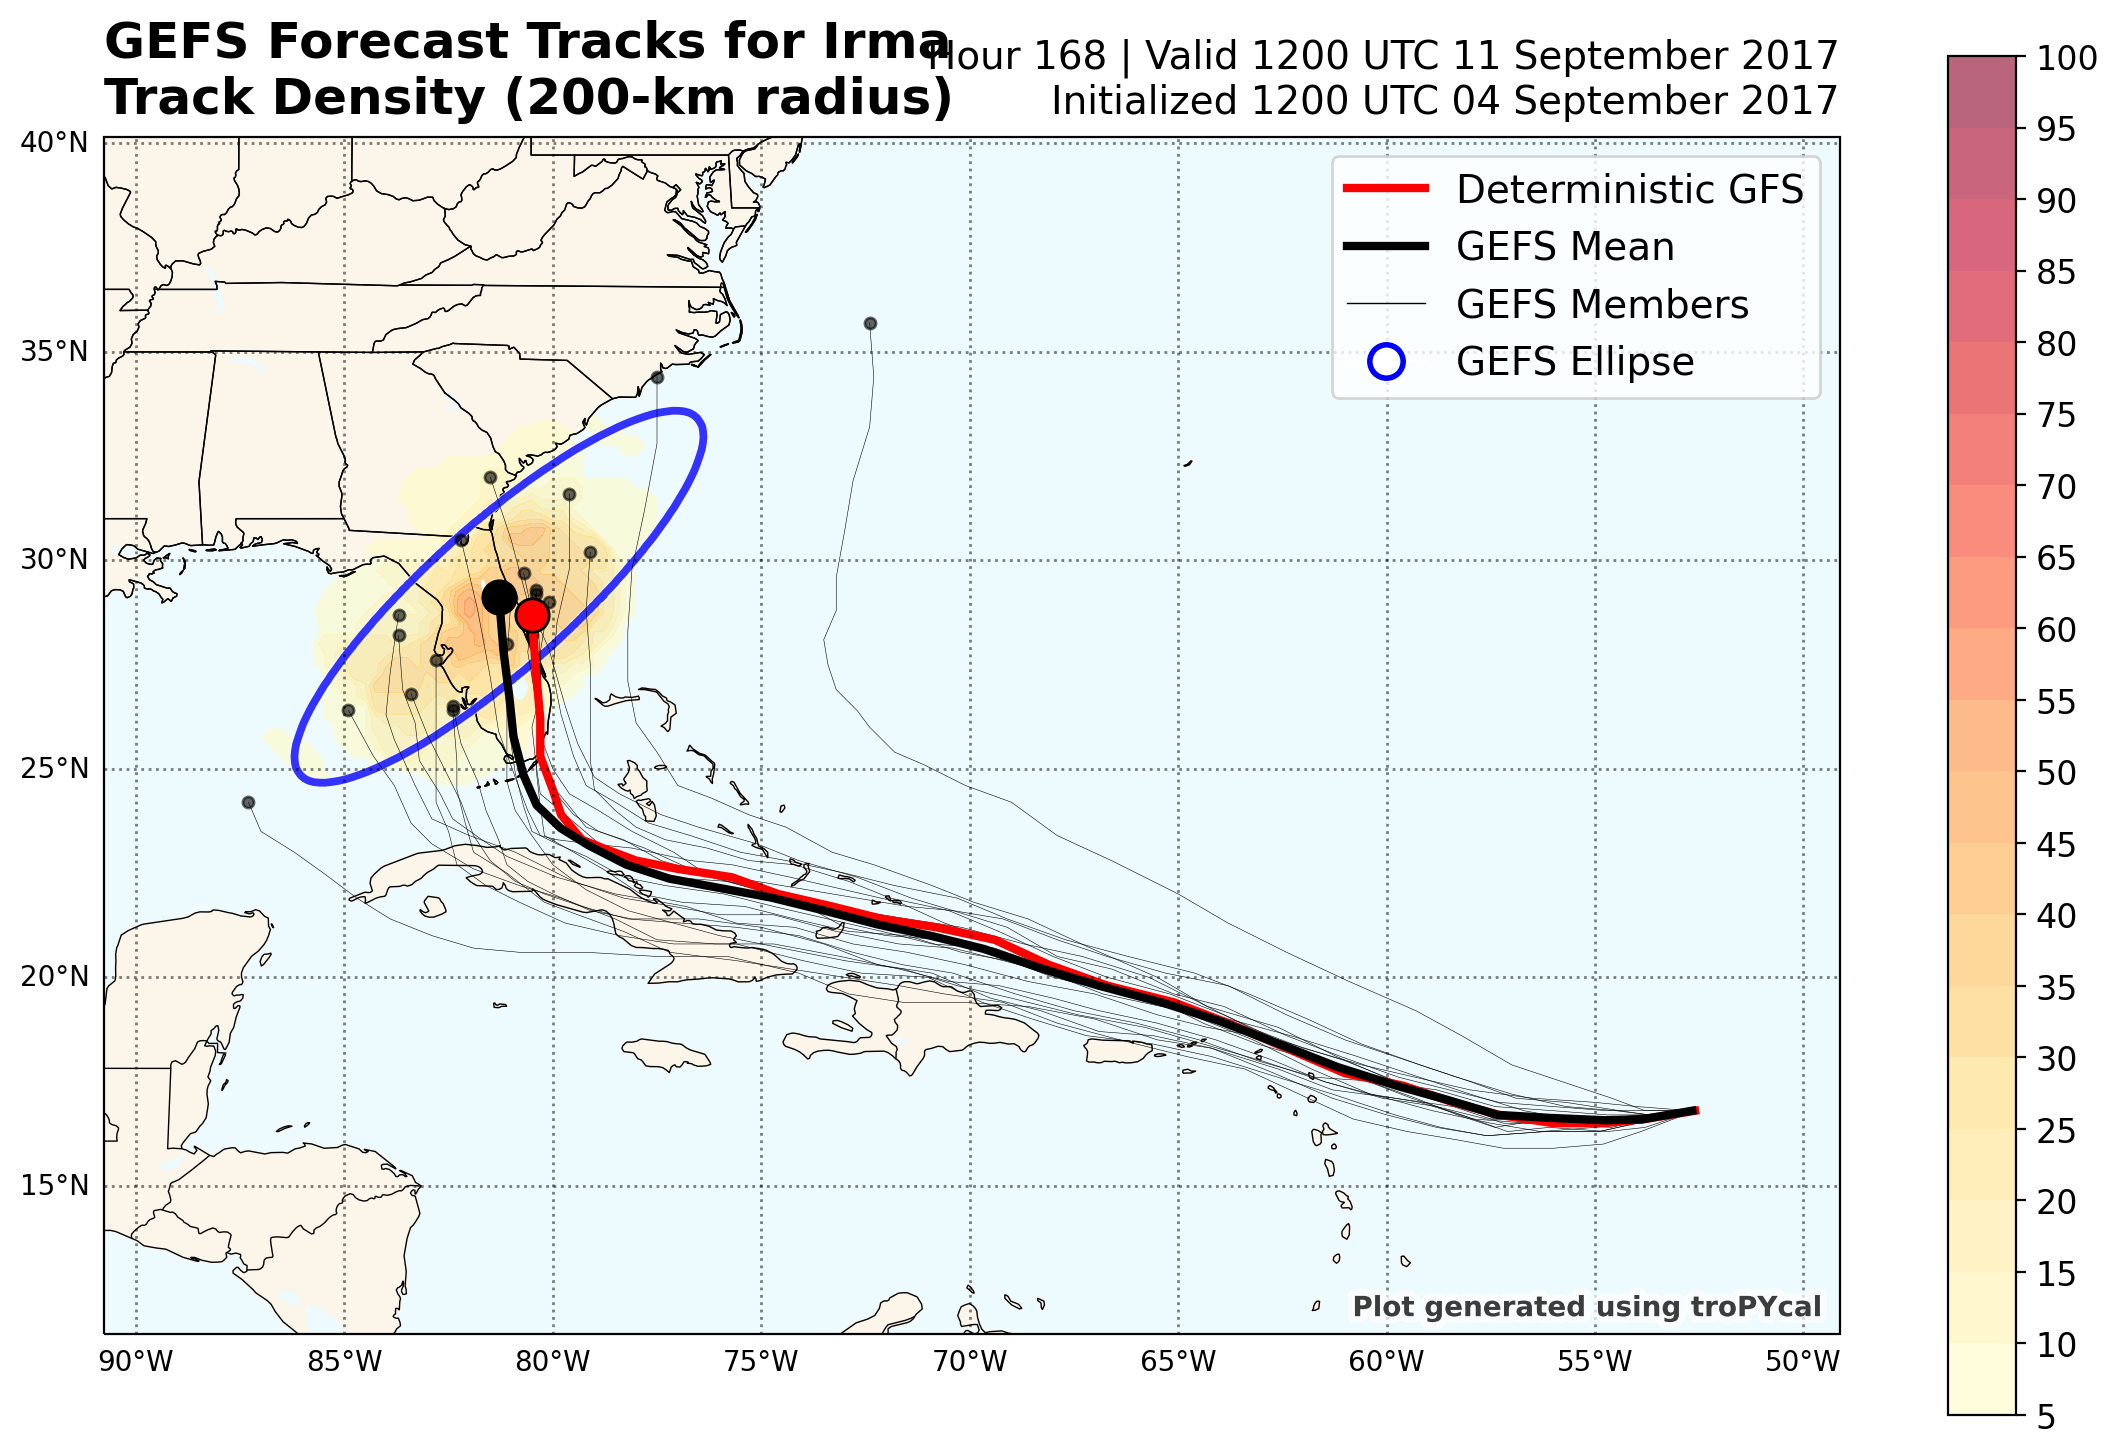

In [18]:
storm.plot_gefs_ensembles(forecast = dt(2017,9,4,12), fhr = [168])

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Irma\nTrack Density (200-km radius)','right':'Hour 144 | Valid 1200 UTC 11 September 2017\nInitialized 1200 UTC 05 September 2017'}>

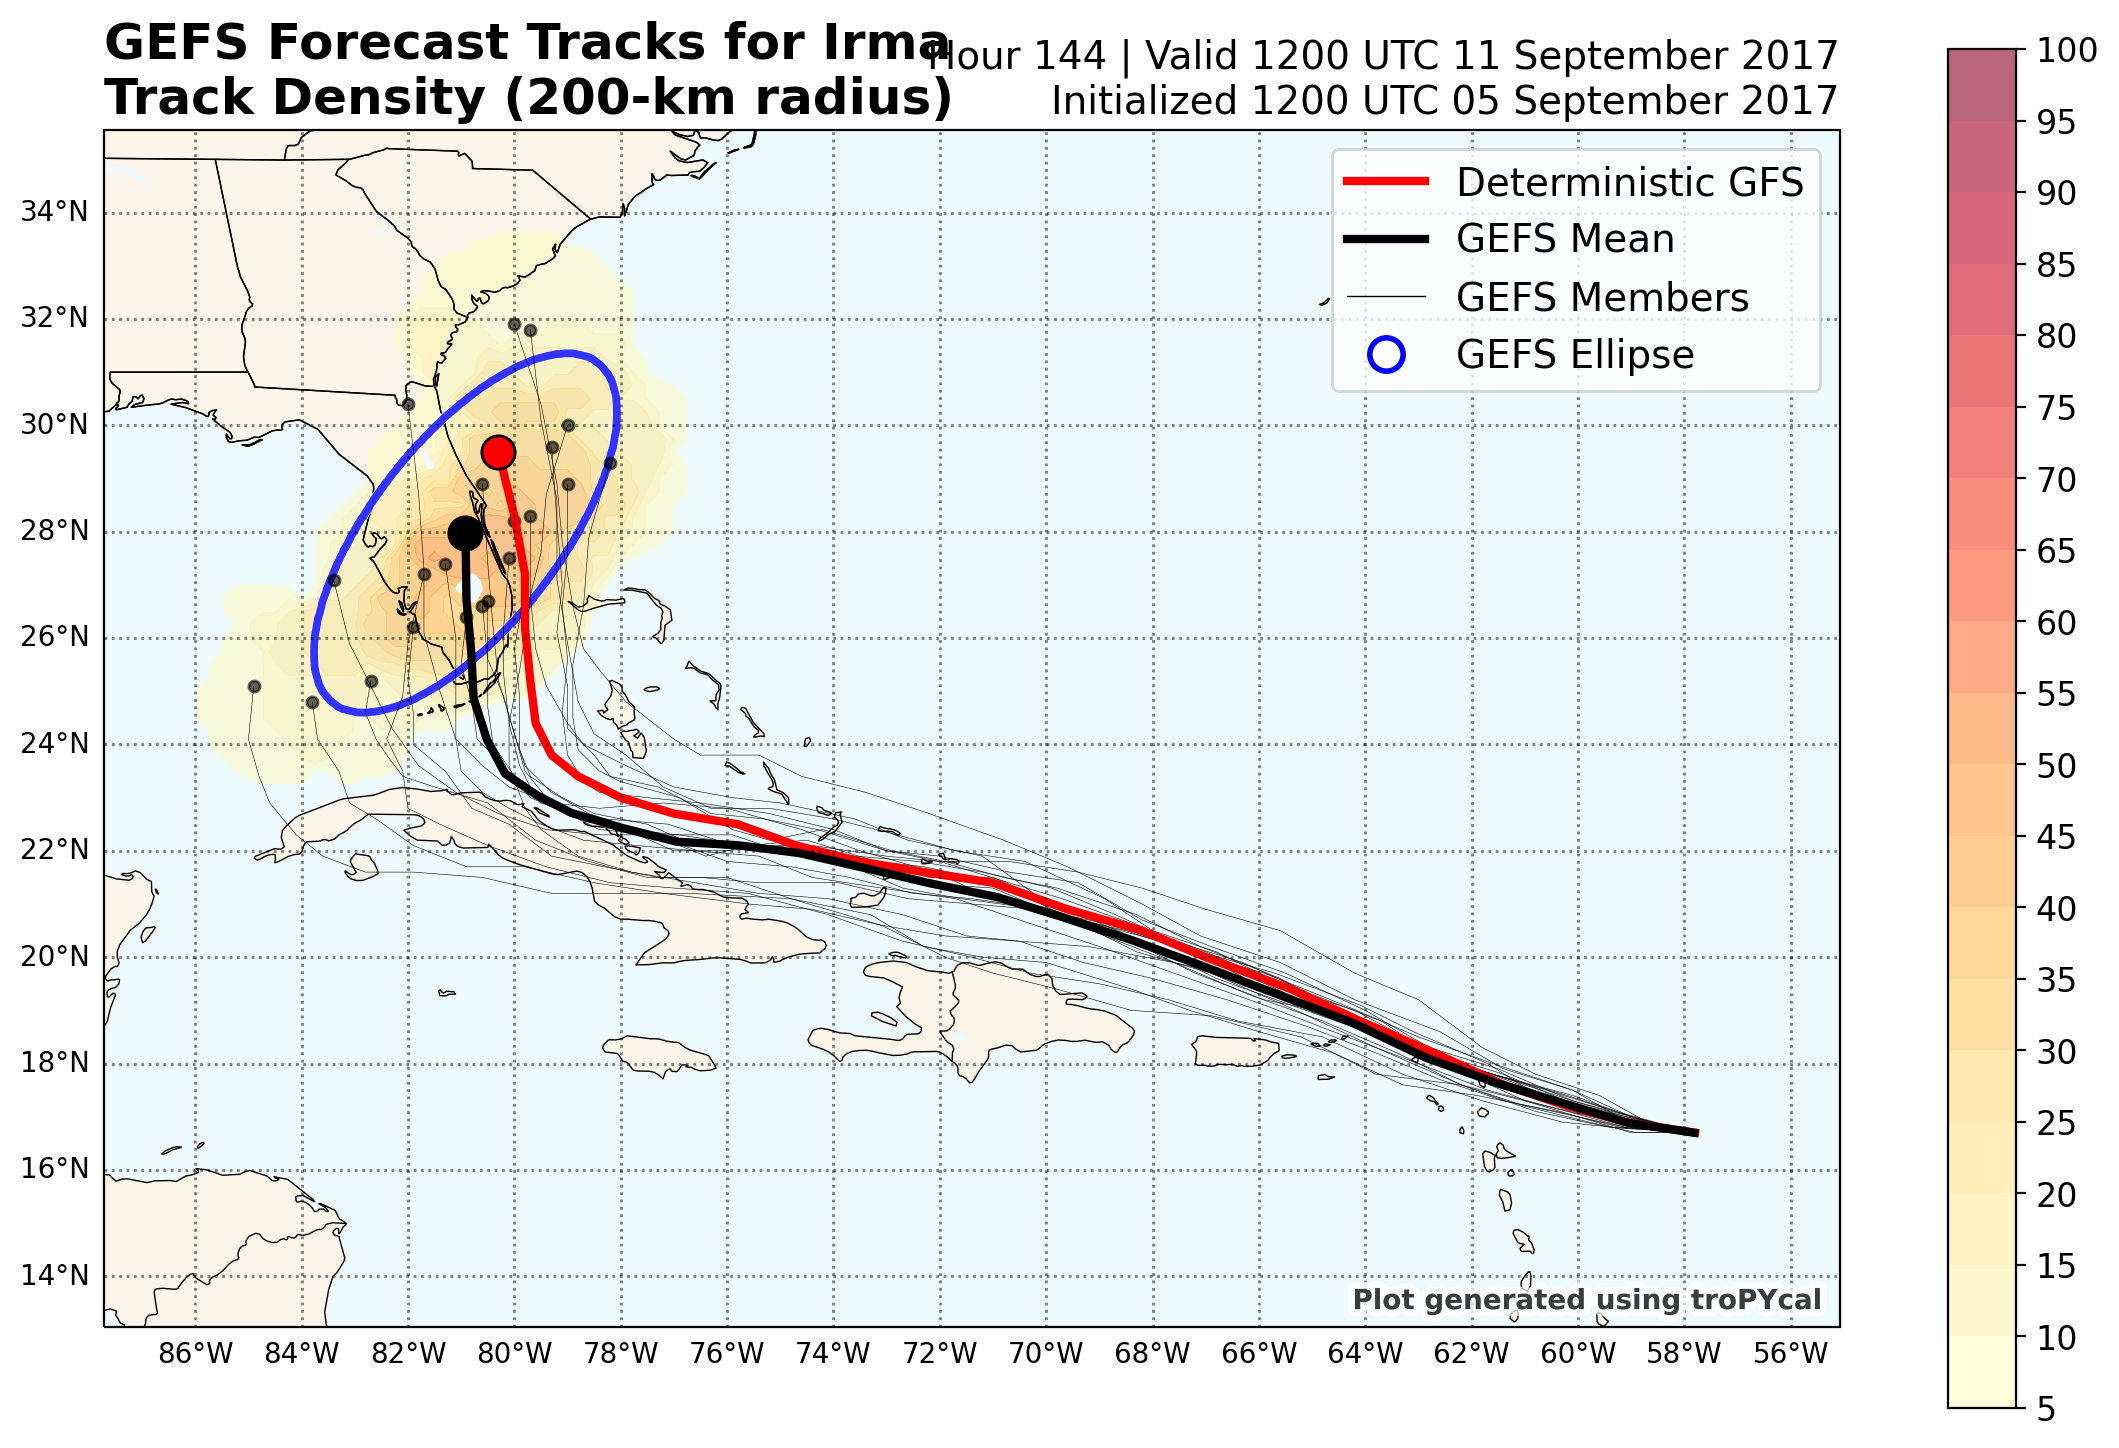

In [20]:
storm.plot_gefs_ensembles(forecast = dt(2017,9,5,12), fhr = [144])

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Irma\nTrack Density (200-km radius)','right':'Hour 120 | Valid 1200 UTC 11 September 2017\nInitialized 1200 UTC 06 September 2017'}>

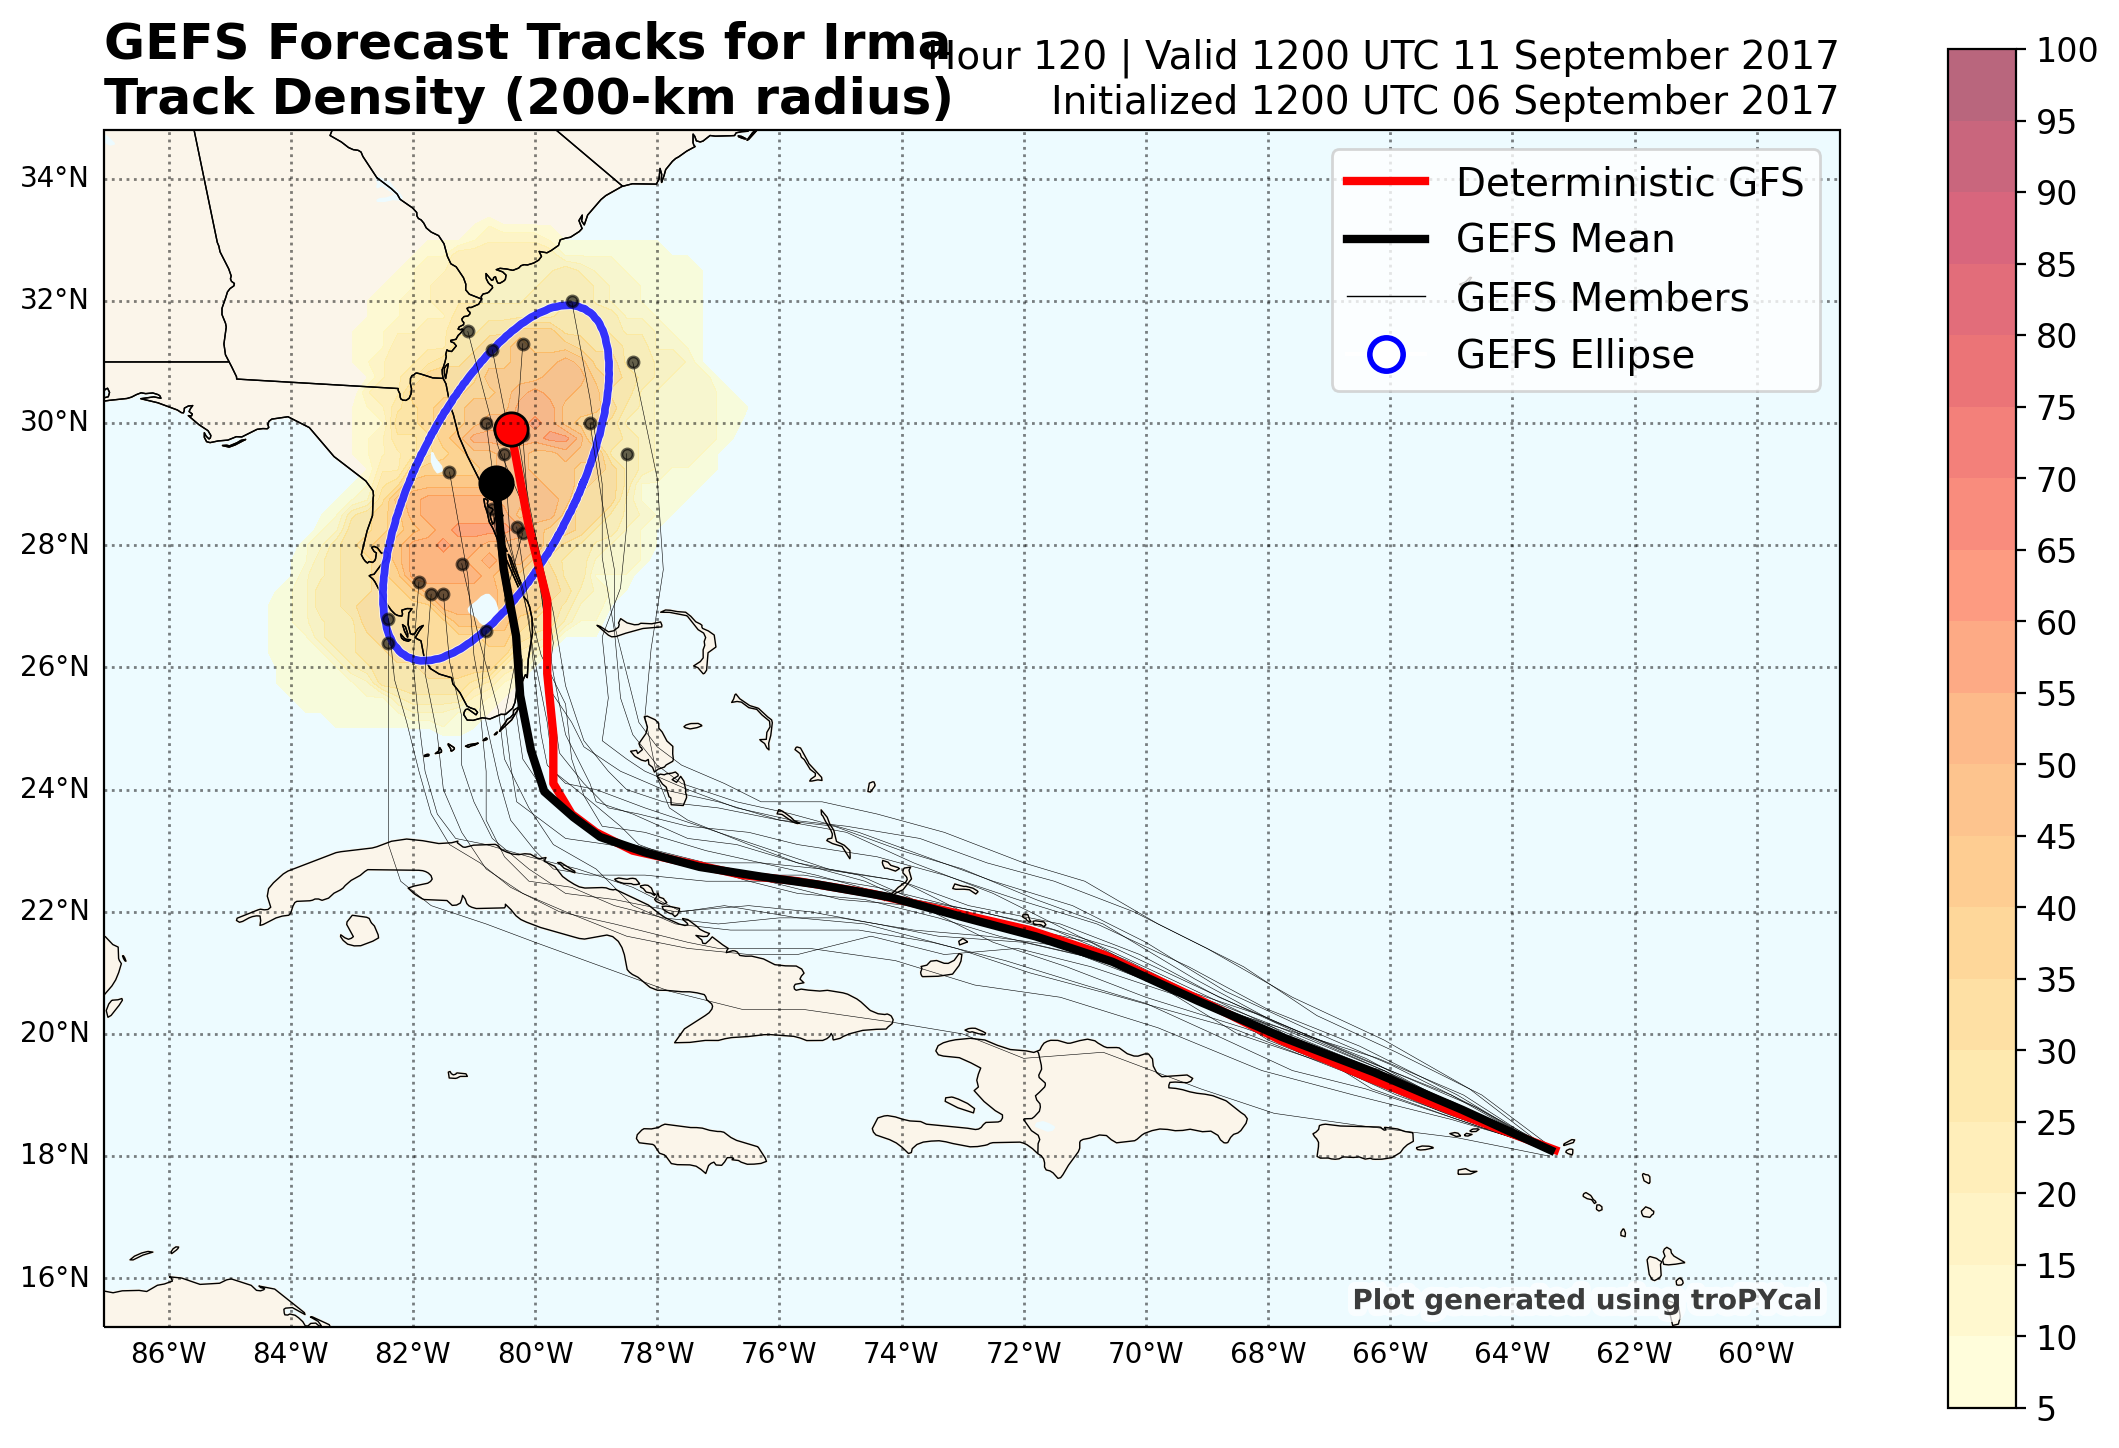

In [21]:
storm.plot_gefs_ensembles(forecast = dt(2017,9,6,12), fhr = [120])

In [ ]:
storm.plot_gefs_ensembles(forecast = dt(2017,9,7,12), fhr = [96])

# Storm object

- We can customize the storm plotting function in numerous ways


- One such way is to interpolate storm data to hourly, and plot the 24-hour sustained wind change:

# Storm Aircraft Reconaissance

- Tropycal converts recon observations to storm-centered coordinates


- One type of plot we can make is an azimuthally averaged hovmoller of flight level wind:

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2020 (25.36 seconds)
--> Starting to assign tornadoes to storms
--> Completed assigning tornadoes to storm (158.25 seconds)


<AxesSubplot:title={'center':'Composite motion-relative tornadoes\nMin threshold: EF-0 | n=234 storms'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>

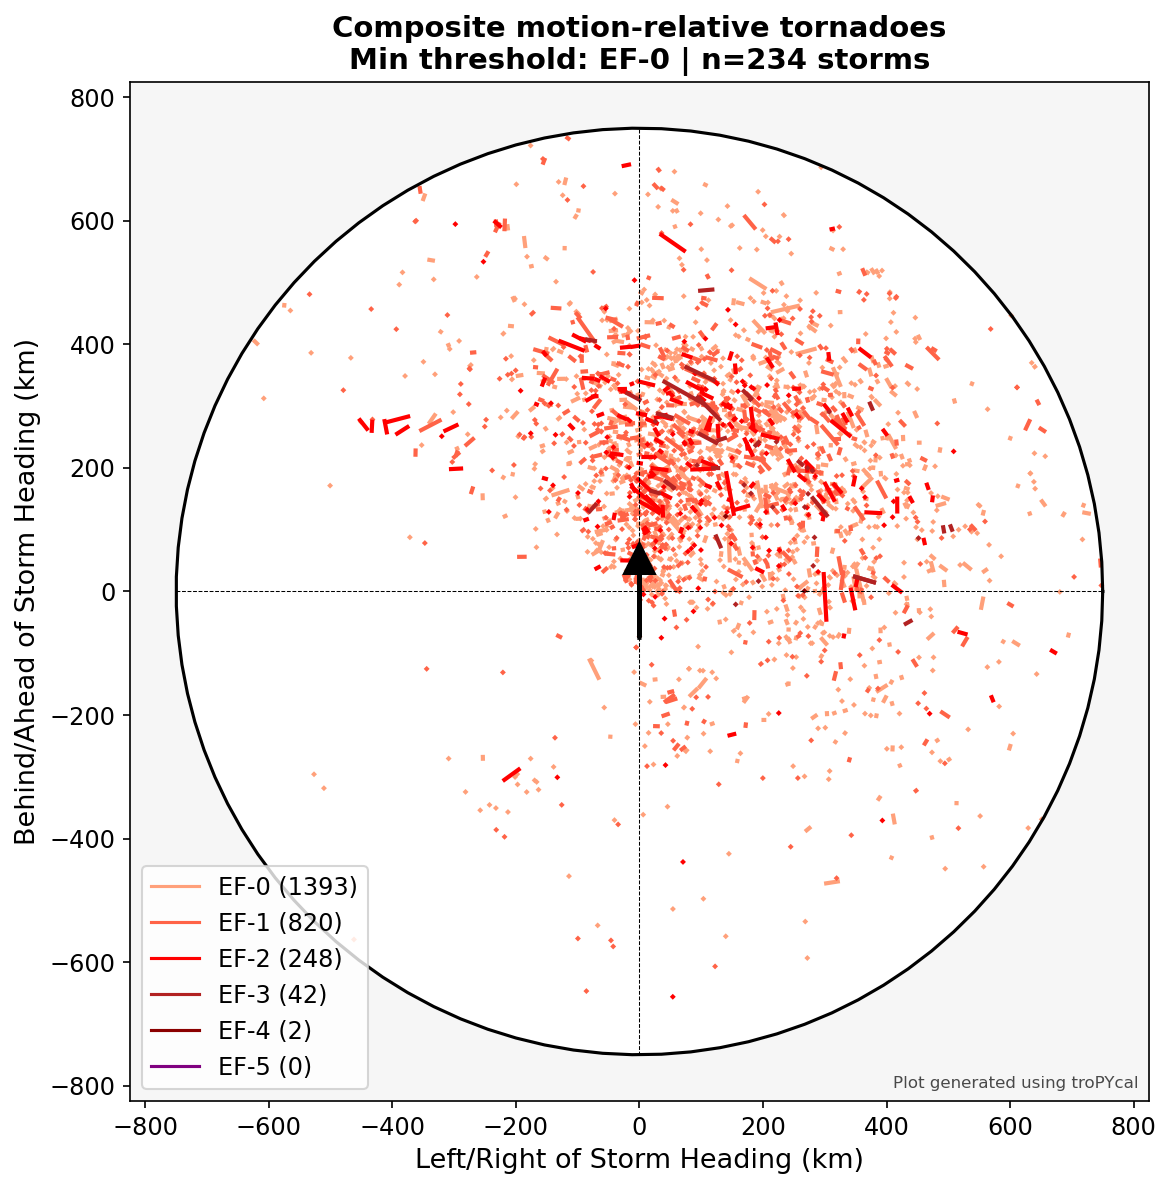

In [39]:
basin.assign_storm_tornadoes(dist_thresh=750)
basin.plot_TCtors_rotated('all')

# Tornado Data

- We can also apply tornado data to individual storms


- Hurricane Ivan (2004) notoriously produced many tornadoes across the United States
    - *Let's plot Ivan's associated tornadoes and **Practically Perfect Hindcast (PPH)**:*

# Tornado Data

- We can also apply the tornado dataset to non-TC applications


- To do so, we create an instance of a TornadoDataset object:

In [41]:
Tors = tornado.TornadoDataset()

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2020 (22.80 seconds)


# Conclusions

- Tropycal provides various methods for tropical cyclone analysis and visualization, in the Atlantic and globally


- We aim for this to be useful for both python and non-python users, for both research and operational purposes


- Tropycal is still in development, and user feedback is valuable for adding or enhancing features


- This script and additional examples are available on our GitHub page: https://github.com/tropycal




**Questions? Contact us at:**

- Tomer Burg - tomerburg@gmail.com

- Sam Lillo - splillo@gmail.com